In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [46]:
def draw_single_table(tbl, ax, cols_labels, rows_labels, fontsize=9):
    assert tbl.shape[0] == len(rows_labels),\
        f"Wrong rows labels count, got {len(rows_labels)}, expected {tbl.shape[0]}"
    assert tbl.shape[1] == len(cols_labels),\
        f"Wrong columns labels count, got {len(cols_labels)}, expected {tbl.shape[1]}"
    ax.set_xticks(range(tbl.shape[1]))
    ax.set_xticklabels(cols_labels)

    ax.set_yticks(range(tbl.shape[0]))
    ax.set_yticklabels(rows_labels)

    im = ax.imshow(tbl, cmap='gray', vmin=0., vmax=1.)
    for (i, j), value in np.ndenumerate(tbl):
        ax.text(j, i,
                '{:0.3f}'.format(value), ha='center',
                va='center',
                c='white' if value < .5 else 'black',
                fontsize=fontsize)
    return im


def draw_big_table(tbls, cols_labels, rows_labels, x_labels, y_labels, title='', fontsize=8):
    n_rows_ = tbls.shape[0]
    n_cols_ = tbls.shape[1]
    assert n_rows_ == len(y_labels),\
        f"Wrong rows labels count, got {len(y_labels)}, expected {n_rows_}"
    assert n_cols_ == len(x_labels),\
        f"Wrong columns labels count, got {len(x_labels)}, expected {n_cols_}"

    fig, ax = plt.subplots(nrows=n_rows_,
                           ncols=n_cols_,
                           sharex=True,
                           sharey=True)
    im = None
    if n_rows_ == 1:
        for j in range(n_cols_):
            im = draw_single_table(tbls[0, j], ax[j], cols_labels, rows_labels, fontsize)
            ax[j].set_xlabel(x_labels[j])
            if j == 0:
                ax[j].set_ylabel(y_labels[0])
    elif n_cols_ == 1:
        for i in range(n_rows_):
            im = draw_single_table(tbls[i, 0], ax[i], cols_labels, rows_labels, fontsize)
            if i == n_rows_ - 1:
                ax[i].set_xlabel(x_labels[0])
                ax[i].set_ylabel(y_labels[i])
    else:
        for i in range(n_rows_):
            for j in range(n_cols_):
                im = draw_single_table(tbls[i, j], ax[i, j], cols_labels, rows_labels, fontsize)
                if i == n_rows_ - 1:
                    ax[i, j].set_xlabel(x_labels[j])
                if j == 0:
                    ax[i, j].set_ylabel(y_labels[i])
    
    fig.subplots_adjust(top=0.85, left=0.14, right=0.95, bottom=0.1, hspace=.05, wspace=.05)
    cbar_ax = fig.add_axes([0.15, 0.9, 0.75, 0.025])
    fig.colorbar(im, cax=cbar_ax, orientation="horizontal", ticks=[0, 1])
    if title:
        fig.suptitle(title)
    

(2, 1, 3, 2)


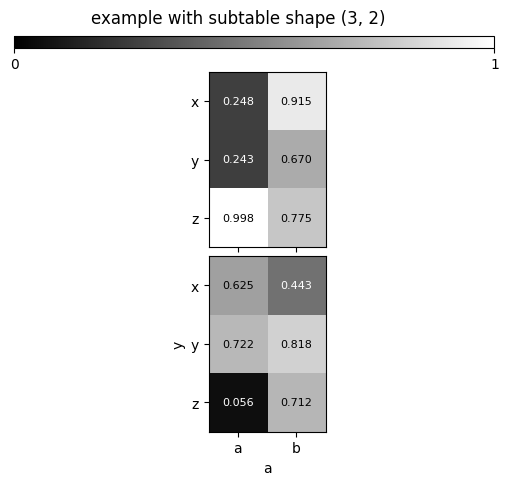

In [47]:

cols_labels = ['a', 'b']
rows_labels = ['x', 'y', 'z']

zeros = np.zeros((3, 2))
zeros[2, 0] = 1
random_imgs = np.array([
    [np.random.rand(3, 2)],
    [np.random.rand(3, 2)],
    # [np.random.rand(3, 2)]
# ],
    # [np.random.rand(3, 2), np.random.rand(3, 2), zeros]
])
x_labels = ['a']
# x_labels = ['a', 'b', 'c']
y_labels = ['x']
y_labels = ['x', 'y']
print(random_imgs.shape)
draw_big_table(tbls=random_imgs,
               cols_labels=cols_labels,
               rows_labels=rows_labels,
               x_labels=x_labels,
               y_labels=y_labels,
               title=f"example with subtable shape {random_imgs.shape[2:]}")


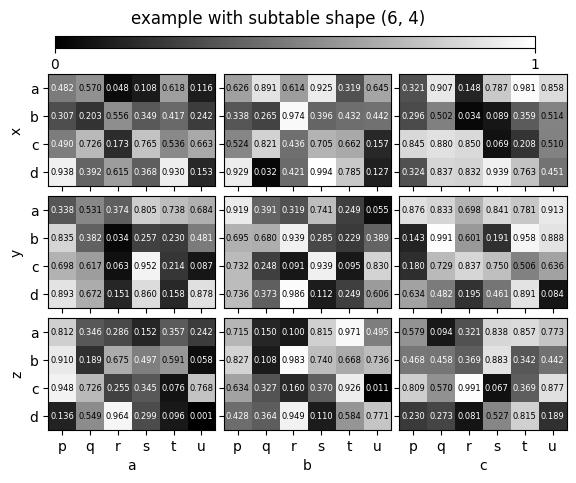

In [48]:


bigger_imgs = np.array([
    [np.random.rand(4, 6), np.random.rand(4, 6), np.random.rand(4, 6)],
    [np.random.rand(4, 6), np.random.rand(4, 6), np.random.rand(4, 6)],
    [np.random.rand(4, 6), np.random.rand(4, 6), np.random.rand(4, 6)]
])
rows_labels = ['a', 'b', 'c', 'd']
cols_labels = ['p', 'q', 'r', 's', 't', 'u']
x_labels = ['a', 'b', 'c']
y_labels = ['x', 'y', 'z']
draw_big_table(tbls=bigger_imgs,
               cols_labels=cols_labels,
               rows_labels=rows_labels,
               x_labels=x_labels,
               y_labels=y_labels,
               title=f"example with subtable shape {bigger_imgs.T.shape[:2]}",
               fontsize=6)
